In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [48]:
#Loading handwritten datasets from keras library
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()       

In [49]:
len(x_train)

60000

In [50]:
len(x_test)

10000

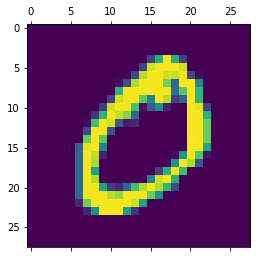

In [51]:
plt.matshow(x_train[1])

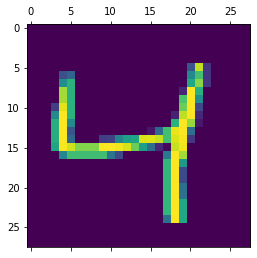

In [52]:
plt.matshow(x_train[2])

In [53]:
y_train[2]

4

In [54]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [55]:
x_train.shape

(60000, 28, 28)

## We want to flatten the array to (60000, 28*28) so that we can feed it to our neural network

In [56]:
#Flattening x_train and x_test

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_train_flattened.shape

(60000, 784)

In [57]:
x_test_flattened.shape

(10000, 784)

In [58]:
#Looking at the array for 1 handwritten picture(which is the number 5)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [59]:
#This is a 1-D array, above one is a 2-D array
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [60]:
#Dense means all of the neurons in our network (on the left side) are connected to every neuron on the right
#Output shape is 10 neurons, and input shape is 784
#Activation function is sigmoid function

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#y_train is already flattened
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 864us/step - loss: 9.9121 - accuracy: 0.8380
Epoch 2/5
1875/1875 [==============================] - 2s 849us/step - loss: 6.1113 - accuracy: 0.8789
Epoch 3/5
1875/1875 [==============================] - 2s 833us/step - loss: 5.6597 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 2s 854us/step - loss: 5.6388 - accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 2s 856us/step - loss: 5.4223 - accuracy: 0.8865


# Trying to scale the values to see how it impacts our accuracy

In [25]:
x_train_flattened2 = x_train_flattened / 255
x_train_flattened2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Fitting the data into the model

In [62]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.4707 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.3045 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 874us/step - loss: 0.2666 - accuracy: 0.9261


# Observe how the accuracy has increased to 92.6% from 88.5%

In [63]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 673us/step - loss: 47.3458 - accuracy: 0.9130


[47.345787048339844, 0.9129999876022339]

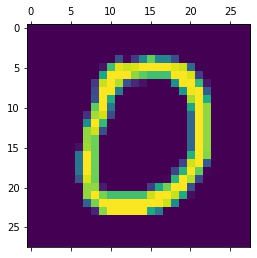

In [42]:
plt.matshow(x_test[10])

In [64]:
y_predicted = model.predict(x_test_flattened)
y_predicted[10]

array([1.0000000e+00, 0.0000000e+00, 1.5504264e-30, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

## These are 10 values (since we have 10 output neurons), we have to find the index of the value which is the maximum, which would be our predicted number

In [65]:
np.argmax(y_predicted[10])

0

# See how it predicted the number to be zero (which is at the zeroth index)

In [67]:
#Using list comprehension to convert these values to predicted numbers
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[3, 2, 1, 0, 4]

In [68]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Now plotting the confusion matrix

In [69]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    1,    0,    1,    1,    0,    2,    0],
       [   0, 1121,    5,    1,    1,    2,    2,    0,    3,    0],
       [  88,   86,  822,    5,   11,    0,    4,    1,   13,    2],
       [  41,    4,  213,  741,    1,    3,    0,    2,    5,    0],
       [   9,    1,    9,   15,  936,    0,    6,    1,    5,    0],
       [  75,    7,   32,  275,   32,  444,    8,    2,   16,    1],
       [  92,    3,  221,    1,   63,   38,  538,    0,    2,    0],
       [  27,   16,   79,  350,   68,    5,    0,  479,    4,    0],
       [  22,   23,   65,  174,   25,   97,   24,   14,  529,    1],
       [  17,   11,    1,   95,  560,    6,    0,  187,   64,   68]])>

Text(69.0, 0.5, 'Truth')

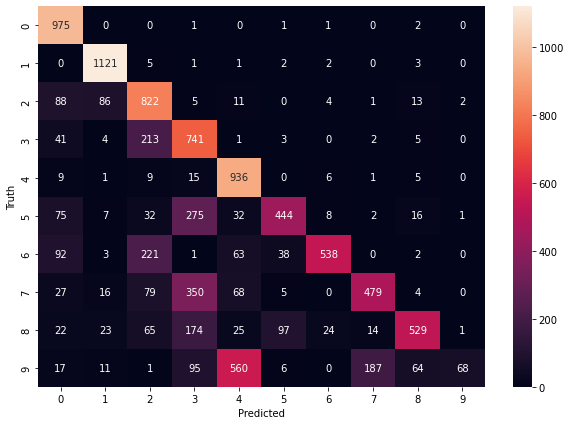

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 975 times the label was 0, and our model predicted it to be zero, 1121 it was one and our model predicted it to be 1 and so on. 213 times the number was 2 but our model predicted it to be 3, similarly 275 times it was 3 but our model predicted it as 5


## Adding hidden layer to the model

In [71]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened2, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9225: 0s - loss: 0.301
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1247 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0521 - accuracy: 0.9837


In [73]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 980us/step - loss: 14.3291 - accuracy: 0.9762


[14.329148292541504, 0.9761999845504761]

## Accuracy increased to 97% from 92%

# In order to avoid the creation of a flattened array, apply this

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3962 - accuracy: 0.8503
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3804 - accuracy: 0.9093
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2915 - accuracy: 0.9268
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2547 - accuracy: 0.9345
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2288 - accuracy: 0.9422
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2193 - accuracy: 0.9452
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2087 - accuracy: 0.9475: 
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2062 - accuracy: 0.9493
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1906 - accuracy: 0.9533
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1